# Data Visualisation

## 4 - Variant effects

For individuals of recent African origin

In [14]:
# Change working directory

import os
os.chdir(r"C:\Users\User\Desktop\Megan\MSC2\Results\5._Posthoc_analysis\Pipeline_GnomAD_SAHGP_14032023\Genomic_data_analysis\Analysis\Visualisation")

In [15]:
# Import modules and packages

import os
import numpy as np
import pandas as pd
import seaborn as sns
import upsetplot
from matplotlib import pyplot as plt

import sys

sys.path.append(
    r"C:\Users\User\Desktop\Megan\MSC2\Results\5._Posthoc_analysis\Pipeline_GnomAD_SAHGP_14032023\Genomic_data_analysis"
)
import Utils.constants as constants
import Utils.functions as functions


In [16]:
# Set plot figure area and font size
sns.set(rc={"figure.figsize": (10, 8)})

plt.rc("font", size=constants.MEDIUM_FONT)  # controls default text sizes
plt.rc("axes", titlesize=constants.MEDIUM_FONT)  # fontsize of the axes title
plt.rc("axes", labelsize=constants.BIGGER_FONT)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=constants.MEDIUM_FONT)  # fontsize of the tick labels
plt.rc("ytick", labelsize=constants.MEDIUM_FONT)  # fontsize of the tick labels
plt.rc("legend", fontsize=constants.SMALL_FONT)  # legend fontsize
plt.rc("figure", titlesize=constants.BIGGER_FONT)  # fontsize of the figure title

### Prepare data

In [17]:
# Import variant effect data from CSV file

vep_data = pd.read_csv(
    os.path.join(
        constants.HOME_PATH,
        "Data",
        "Processed",
        "Variant_effects.csv",
    )
).drop(columns="Unnamed: 0")

vep_data.head(5)

C:\Users\User\AppData\Local\Temp\ipykernel_22576\4233666314.py:3: DtypeWarning: Columns (26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  vep_data = pd.read_csv(


,CHROM,POS,REF,ALT,CONS,EXON,SGNF,DBSNP,HAPLO,REGUL,...,FATS,FATC,FUNE,FUNS,FUNC,GWAVAE,GWAVAS,GWAVAC,ID,GENE
0,13,110148891,C,G,downstream,NaN,.,.,.,.,...,0.18997,0.77,.,.,.,neutral,0.30,0.68,rs552586867,COL4A1
1,13,110148917,C,G,downstream,NaN,.,http://www.ncbi.nlm.nih.gov/SNP/snp_ref.cgi?se...,http://www.broadinstitute.org/mammals/haploreg...,http://regulomedb.org/snp/chr13/110801263,...,0.18963,0.77,neutral,8.51599164992024E-6,0.80,neutral,0.32,0.71,rs59409892,COL4A1
2,13,110148920,G,C,downstream,NaN,.,.,.,.,...,0.21184,0.75,?,0.622785975437062,0.49,neutral,0.32,0.71,rs535182970,COL4A1
3,13,110148959,A,G,UTR3,NaN,Likely benign,http://www.ncbi.nlm.nih.gov/SNP/snp_ref.cgi?se...,http://www.broadinstitute.org/mammals/haploreg...,http://regulomedb.org/snp/chr13/110801305,...,0.82375,0.82,neutral,7.52439751165574E-20,0.80,neutral,0.44,0.53,rs56406633,COL4A1
4,13,110148971,G,C,UTR3,NaN,.,.,.,.,...,0.95264,0.91,deleterious,1.19368630042138,0.74,neutral,0.44,0.53,rs568536001,COL4A1


In [18]:
# Filter by variants present in individuals of recent African origin

# Import dataframe of variants present African individuals

ih_afr = pd.read_csv(
    os.path.join(
        constants.HOME_PATH,
        "Data",
        "Processed",
        "IH_allele_counts.csv",
    )
)

# Subset by individuals of recent African origin. Ensure that variants with recent African alternate counts = 0 are removed as these variants are not present in the African population
ih_recent_afr = ih_afr[(ih_afr["REG"] == "Recent African") & ~(ih_afr["IH_ALT_CTS"] == 0)]

# Left merge of variants found in recent African origin individuals and predicted variant effects
recent_african_vep_data = ih_recent_afr.merge(vep_data, how="left", on=["ID", "REF", "ALT", "POS", "GENE"])

recent_african_vep_data.head(5)

,Unnamed: 0,ID,REF,ALT,IH_REF_CTS,IH_ALT_CTS,POP_ALLELE_COUNT,SUB_POP,REG,VARIANT_TYPE,...,DANNC,FATE,FATS,FATC,FUNE,FUNS,FUNC,GWAVAE,GWAVAS,GWAVAC
0,4,chr11:34438836T-C,T,C,1607,1,1656,NaN,Recent African,SNP,...,0.85,?,0.31479,0.48,neutral,0.515790218073507,0.62,deleterious,0.48,0.64
1,31,chr11:34438889G-C,G,C,1607,1,1656,NaN,Recent African,SNP,...,0.80,deleterious,0.85724,0.82,deleterious,2.11274484081118,0.67,neutral,0.45,0.53
2,135,chr11:34439223G-C,G,C,1606,2,1656,NaN,Recent African,SNP,...,0.80,neutral,0.17413,0.85,neutral,0.515790218021613,0.62,neutral,0.11,0.79
3,186,chr11:34439262C-T,C,T,1607,1,1656,NaN,Recent African,SNP,...,0.75,neutral,0.10214,0.85,deleterious,2.10626871747118,0.67,neutral,0.20,0.78
4,191,chr11:34439312G-A,G,A,1607,1,1656,NaN,Recent African,SNP,...,0.89,neutral,0.14244,0.91,deleterious,1.12780584702118,0.74,neutral,0.31,0.70


### Proportion of pathogenic variants in each gene

In [19]:
# Group dataframe information by gene and prediction value

pathogenicity_grouped = (
    recent_african_vep_data.groupby(["GENE", "PSNPE"])
    .count()
    .reset_index()
    .rename(columns={"ID": "COUNT"})[["GENE", "PSNPE", "COUNT"]]
)

# Pivot dataframe
pathogenicity_pivot = pd.pivot(pathogenicity_grouped, index=['GENE'], columns=['PSNPE'], values=['COUNT'])
pathogenicity_pivot.columns = pathogenicity_pivot.columns.droplevel()
pathogenicity_pivot= pathogenicity_pivot.reset_index().rename(columns={"deleterious":"DELETERIOUS", "neutral":"NEUTRAL", "not_classified":"NOT_CLASSIFIED"})

pathogenicity_pivot.head(5)

PSNPE,GENE,DELETERIOUS,NEUTRAL
0,AGT,45,1084
1,AP4B1,30,110
2,CARD8,112,1434
3,CAT,37,477
4,COL4A1,77,3172


In [20]:
# Add total gene variant counts to enable the calculation of variants without deleteriousness classifications.

# Import gene variant counts

recent_african_gene_count_grouped = pd.read_csv(
    os.path.join(
        constants.HOME_PATH,
        "Data",
        "Processed",
        "Gene_variant_counts.csv",
    )
).drop(columns="Unnamed: 0")

pathogenicity_pivot = pathogenicity_pivot.merge(recent_african_gene_count_grouped, on="GENE").set_index("GENE").rename(columns = {"COUNT":"TOTAL"}).reset_index()

pathogenicity_pivot.head(5)

,GENE,DELETERIOUS,NEUTRAL,TOTAL
0,AGT,45,1084,1310
1,AP4B1,30,110,159
2,CARD8,112,1434,2171
3,CAT,37,477,632
4,COL4A1,77,3172,4155


In [21]:
# Calculate number of variants without deleterious classifications

pathogenicity_pivot["NOT_CLASSIFIED"] = (pathogenicity_pivot.TOTAL - (pathogenicity_pivot.DELETERIOUS + pathogenicity_pivot.NEUTRAL))
pathogenicity_pivot = pathogenicity_pivot.drop(columns="TOTAL").set_index("GENE")
pathogenicity_pivot.tail(5)

,DELETERIOUS,NEUTRAL,NOT_CLASSIFIED
GENE,,,
IL1B,3,95,17
IL6,12,96,16
MTHFR,23,159,322
NOS3,52,399,114
TNF,7,22,6


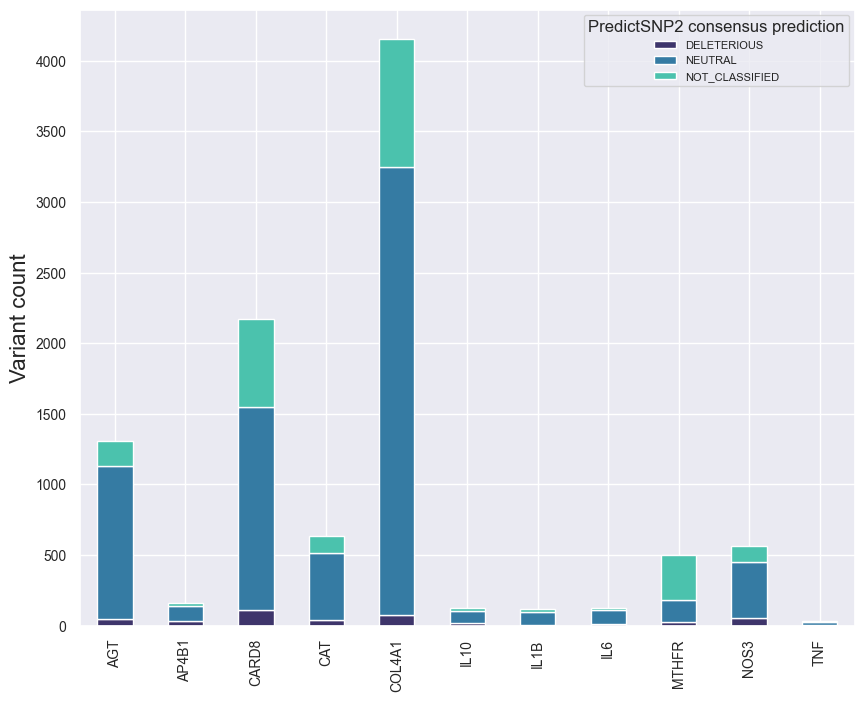

In [22]:
# Create stacked barplot of pathogenicity proportion information for each gene

custom_palette = sns.color_palette("mako", 3)
pathogenicity_plot = functions.create_plot(
    data=pathogenicity_pivot,
    plot_type="stacked_barplot",
    palette=custom_palette,
    legend_title="PredictSNP2 consensus prediction",
    legend_loc="upper right",
    x="GENE",
    xlabel=None,
    ylabel="Variant count",
    horizontal_stack = False
)

### Frequency comparison of deleterious and neutral variants

In [23]:
# Re-use recent_african_vep_data dataframe. Drop rows with missing PredictSNP2 consensus scores, consensus effects or recent African allele frequencies

recent_african_vep_dropped = recent_african_vep_data.replace(".", np.NaN).dropna(subset=["PSNPS", "PSNPE", "CORR_IH_AF"])
recent_african_vep_dropped.head(5)

,Unnamed: 0,ID,REF,ALT,IH_REF_CTS,IH_ALT_CTS,POP_ALLELE_COUNT,SUB_POP,REG,VARIANT_TYPE,...,DANNC,FATE,FATS,FATC,FUNE,FUNS,FUNC,GWAVAE,GWAVAS,GWAVAC
0,4,chr11:34438836T-C,T,C,1607,1,1656,NaN,Recent African,SNP,...,0.85,?,0.31479,0.48,neutral,0.515790218073507,0.62,deleterious,0.48,0.64
1,31,chr11:34438889G-C,G,C,1607,1,1656,NaN,Recent African,SNP,...,0.80,deleterious,0.85724,0.82,deleterious,2.11274484081118,0.67,neutral,0.45,0.53
2,135,chr11:34439223G-C,G,C,1606,2,1656,NaN,Recent African,SNP,...,0.80,neutral,0.17413,0.85,neutral,0.515790218021613,0.62,neutral,0.11,0.79
3,186,chr11:34439262C-T,C,T,1607,1,1656,NaN,Recent African,SNP,...,0.75,neutral,0.10214,0.85,deleterious,2.10626871747118,0.67,neutral,0.20,0.78
4,191,chr11:34439312G-A,G,A,1607,1,1656,NaN,Recent African,SNP,...,0.89,neutral,0.14244,0.91,deleterious,1.12780584702118,0.74,neutral,0.31,0.70


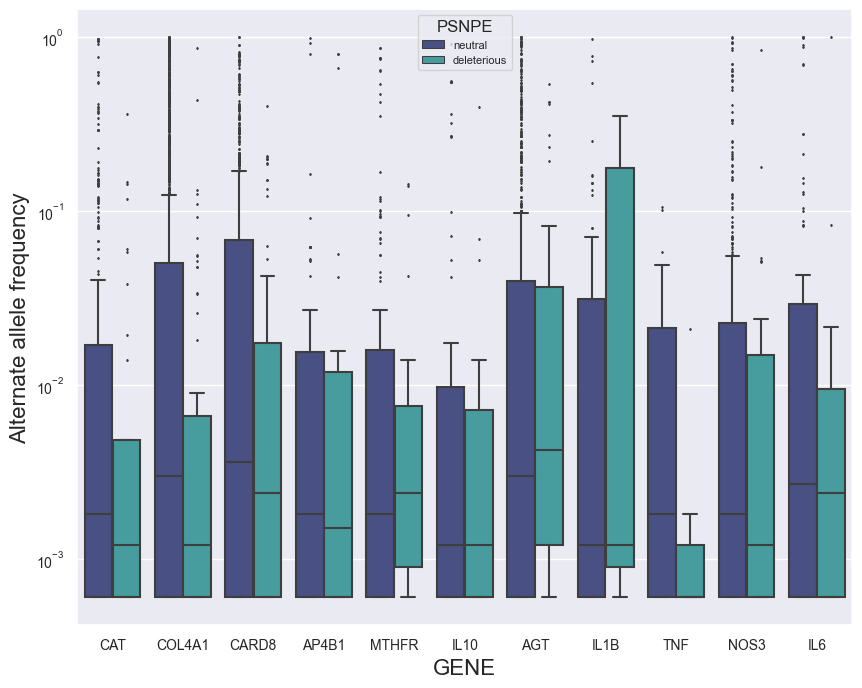

In [24]:
# Create box plots

flierprops = dict(markersize=1)
boxplot = sns.boxplot(data = recent_african_vep_dropped, x="GENE", y="CORR_IH_AF", hue="PSNPE", palette="mako", flierprops=flierprops)

boxplot.set_yscale('log')
boxplot.set_ylabel("Alternate allele frequency")
plt.show()

### Impact factor of all variants

In [25]:
# Re-use recent_african_vep_data dataframe 

# Generate a subset of the data

af_VEP_subset = recent_african_vep_data.replace(".", np.NaN)[
    [
        "ID",
        "POS",
        "REF",
        "ALT",
        "CORR_IH_AF",
        "GENE",
        "CADDE",
        "FATE",
        "DANNE",
        "GWAVAE",
        "FUNE",
    ]
]

# Score variants based on number of deleterious effect predictions

af_VEP_scored = af_VEP_subset.copy()

pd.options.mode.chained_assignment = None

af_VEP_scored["VAR_IMPACT"] = af_VEP_scored.eq("deleterious").sum(axis=1)

# Sort by variant impact
af_VEP_scored = af_VEP_scored.sort_values(by="VAR_IMPACT", ascending=False)

af_VEP_scored.head(5)

,ID,POS,REF,ALT,CORR_IH_AF,GENE,CADDE,FATE,DANNE,GWAVAE,FUNE,VAR_IMPACT
4418,rs148868158,34461370,G,A,0.001208,CAT,deleterious,deleterious,deleterious,deleterious,deleterious,5
1338,chr13:110801480C-A,110149133,C,A,0.000604,COL4A1,deleterious,deleterious,deleterious,deleterious,deleterious,5
5325,rs200688214,11794442,C,G,0.001208,MTHFR,deleterious,deleterious,deleterious,deleterious,deleterious,5
6914,rs541115295,230691565,G,A,0.000604,AGT,deleterious,deleterious,deleterious,deleterious,deleterious,5
6159,rs3918202,151010437,G,T,0.020531,NOS3,deleterious,deleterious,deleterious,deleterious,deleterious,5


In [26]:
# Save gene impact factors

af_VEP_scored.to_csv(
    os.path.join(
        constants.HOME_PATH,
        "Data",
        "Processed",
        "Variant_impact_factors.csv",
    )
)

### Impact factor of common variants

In [27]:
# Re-use af_VEP_scored dataframe. Filter for common variants.

af_VEP_scored_common = af_VEP_scored[af_VEP_scored["CORR_IH_AF"] > 0.5 ].sort_values(by="VAR_IMPACT", ascending=False)

af_VEP_scored_common.head(4)

,ID,POS,REF,ALT,CORR_IH_AF,GENE,CADDE,FATE,DANNE,GWAVAE,FUNE,VAR_IMPACT
3629,rs1217401,113896329,A,G,0.800121,AP4B1,deleterious,deleterious,deleterious,?,deleterious,4
4696,rs1800795,22727026,C,G,0.998188,IL6,deleterious,deleterious,neutral,deleterious,deleterious,4
9949,rs971173,113905292,G,T,0.800725,AP4B1,deleterious,?,deleterious,deleterious,deleterious,4
6337,rs5051,230714126,C,T,0.947464,AGT,neutral,deleterious,neutral,deleterious,deleterious,3


### Impact factor of rare and very rare variants

In [28]:
# Re-use af_VEP_scored dataframe. Filter for rare and very rare variants.

af_VEP_scored_rare = af_VEP_scored[af_VEP_scored["CORR_IH_AF"] < 0.005 ].sort_values(by="VAR_IMPACT", ascending=False)
af_VEP_scored_rare
af_VEP_scored_rare_grouped = af_VEP_scored_rare.groupby(["GENE", "VAR_IMPACT"]).count().reset_index()
af_VEP_scored_rare_grouped[af_VEP_scored_rare_grouped.GENE == "TNF"]

,GENE,VAR_IMPACT,ID,POS,REF,ALT,CORR_IH_AF,CADDE,FATE,DANNE,GWAVAE,FUNE
59,TNF,0,2,2,2,2,2,0,0,0,0,0
60,TNF,1,7,7,7,7,7,7,7,7,7,7
61,TNF,2,3,3,3,3,3,3,3,3,3,3
62,TNF,3,6,6,6,6,6,6,6,6,6,6
63,TNF,4,1,1,1,1,1,1,1,1,1,1
64,TNF,5,1,1,1,1,1,1,1,1,1,1


### Impact factor and frequency of NESHIE variants

In [30]:
# Re-use af_VEP_scored dataframe. Filter dataframe for NESHIE variants only. 

af_VEP_scored_neshie = af_VEP_scored[af_VEP_scored.ID.isin(constants.NESHIE_RSIDS)].reset_index(drop=True).sort_values(by=["VAR_IMPACT", "CORR_IH_AF"], ascending=False)

af_VEP_scored_neshie

,ID,POS,REF,ALT,CORR_IH_AF,GENE,CADDE,FATE,DANNE,GWAVAE,FUNE,VAR_IMPACT
1,rs1800795,22727026,C,G,0.998188,IL6,deleterious,deleterious,neutral,deleterious,deleterious,4
0,rs1217401,113896329,A,G,0.800121,AP4B1,deleterious,deleterious,deleterious,?,deleterious,4
4,rs1800779,150992855,G,A,0.850242,NOS3,deleterious,neutral,deleterious,neutral,deleterious,3
3,rs1801131,11794419,T,G,0.142512,MTHFR,deleterious,deleterious,neutral,?,deleterious,3
2,rs1476413,11792243,C,T,0.138889,MTHFR,deleterious,?,deleterious,neutral,deleterious,3
5,rs2066992,22728630,G,T,0.083333,IL6,deleterious,deleterious,neutral,neutral,deleterious,3
7,rs2070744,150992991,C,T,0.847222,NOS3,neutral,neutral,neutral,deleterious,deleterious,2
8,rs1518111,206771300,T,C,0.556159,IL10,deleterious,neutral,deleterious,neutral,?,2
6,rs4846049,11790308,T,G,0.469203,MTHFR,neutral,neutral,neutral,deleterious,deleterious,2
9,rs1800796,22726627,G,C,0.103865,IL6,neutral,?,neutral,deleterious,deleterious,2
